In [23]:
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [24]:
file_path = "C:\\Users\\Sherif Tarfa\\Downloads\\archive\\train"
file_path2 = r"C:\Users\Sherif Tarfa\Downloads\archive (1)\melanoma_cancer_dataset\train"

name_class_dataset1 = os.listdir(file_path)
print("Class names from dataset 1:", name_class_dataset1)

name_class_dataset2 = os.listdir(file_path2)
print("Class names from dataset 2:", name_class_dataset2)

Class names from dataset 1: ['benign', 'malignant']
Class names from dataset 2: ['benign', 'malignant']


In [25]:
filepaths_dataset1 = list(glob.glob(file_path + '/**/*.*'))
labels_dataset1 = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_dataset1))

filepaths_dataset2 = list(glob.glob(file_path2 + '/**/*.*'))
labels_dataset2 = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_dataset2))
labels_dataset1
labels_dataset2

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [26]:
dataset1 = pd.DataFrame({'FilePath': pd.Series(filepaths_dataset1, name='FilePath').astype(str),
                         'Label': pd.Series(labels_dataset1, name='Label')})


dataset2 = pd.DataFrame({'FilePath': pd.Series(filepaths_dataset2, name='FilePath').astype(str),
                         'Label': pd.Series(labels_dataset2, name='Label')})
dataset1

,FilePath,Label
0,C:\Users\Sherif Tarfa\Downloads\archive\train\...,benign
1,C:\Users\Sherif Tarfa\Downloads\archive\train\...,benign
2,C:\Users\Sherif Tarfa\Downloads\archive\train\...,benign
3,C:\Users\Sherif Tarfa\Downloads\archive\train\...,benign
4,C:\Users\Sherif Tarfa\Downloads\archive\train\...,benign
...,...,...
2632,C:\Users\Sherif Tarfa\Downloads\archive\train\...,malignant
2633,C:\Users\Sherif Tarfa\Downloads\archive\train\...,malignant
2634,C:\Users\Sherif Tarfa\Downloads\archive\train\...,malignant
2635,C:\Users\Sherif Tarfa\Downloads\archive\train\...,malignant


In [27]:
dataset2

,FilePath,Label
0,C:\Users\Sherif Tarfa\Downloads\archive (1)\me...,benign
1,C:\Users\Sherif Tarfa\Downloads\archive (1)\me...,benign
2,C:\Users\Sherif Tarfa\Downloads\archive (1)\me...,benign
3,C:\Users\Sherif Tarfa\Downloads\archive (1)\me...,benign
4,C:\Users\Sherif Tarfa\Downloads\archive (1)\me...,benign
...,...,...
9600,C:\Users\Sherif Tarfa\Downloads\archive (1)\me...,malignant
9601,C:\Users\Sherif Tarfa\Downloads\archive (1)\me...,malignant
9602,C:\Users\Sherif Tarfa\Downloads\archive (1)\me...,malignant
9603,C:\Users\Sherif Tarfa\Downloads\archive (1)\me...,malignant


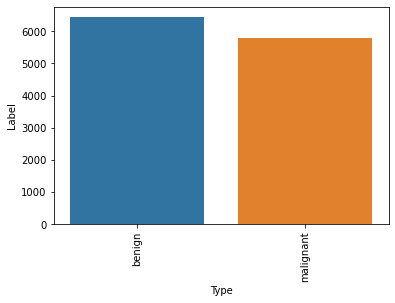

benign       6440
malignant    5802
Name: Label, dtype: int64

In [28]:
data = pd.concat([dataset1, dataset2], axis=0).reset_index(drop=True)

data = data.sample(frac=1).reset_index(drop=True)

counts = data['Label'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)
plt.show()
counts

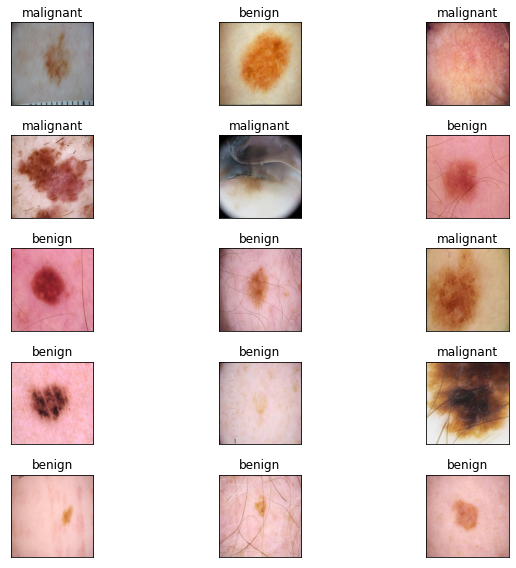

In [29]:
#split test = 25% of the data and train is 75%
train, test = train_test_split(data, test_size=0.25, random_state=42)


fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train.FilePath.iloc[i]))  
    ax.set_title(train.Label.iloc[i])  

plt.tight_layout()
plt.show()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='FilePath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='FilePath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False  # No need to shuffle the test set
)

# Create CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=[early_stopping]
)

# Evaluate model 
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels back to original labels
class_labels = train_generator.class_indices
inverse_class_labels = {v: k for k, v in class_labels.items()}
predicted_labels_names = [inverse_class_labels[label] for label in predicted_labels]

#classification report
print(classification_report(test.Label, predicted_labels_names))


Found 9181 validated image filenames belonging to 2 classes.
Found 3061 validated image filenames belonging to 2 classes.


Epoch 1/20


287/287 [==============================] - 431s 1s/step - loss: 1.3248 - accuracy: 0.7630 - val_loss: 0.4478 - val_accuracy: 0.8066
Epoch 2/20
287/287 [==============================] - 291s 1s/step - loss: 0.4117 - accuracy: 0.8122 - val_loss: 0.3781 - val_accuracy: 0.8438
Epoch 3/20
287/287 [==============================] - 326s 1s/step - loss: 0.4004 - accuracy: 0.8226 - val_loss: 0.3429 - val_accuracy: 0.8585
Epoch 4/20
287/287 [==============================] - 351s 1s/step - loss: 0.3883 - accuracy: 0.8324 - val_loss: 0.4377 - val_accuracy: 0.7965
Epoch 5/20
287/287 [==============================] - 343s 1s/step - loss: 0.3922 - accuracy: 0.8329 - val_loss: 0.3396 - val_accuracy: 0.8569
Epoch 6/20
287/287 [==============================] - 372s 1s/step - loss: 0.3753 - accuracy: 0.8368 - val_loss: 0.3531 - val_accuracy: 0.8579
Epoch 7/20
287/2

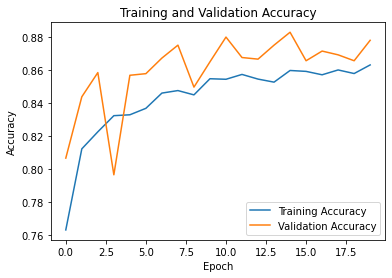

In [31]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

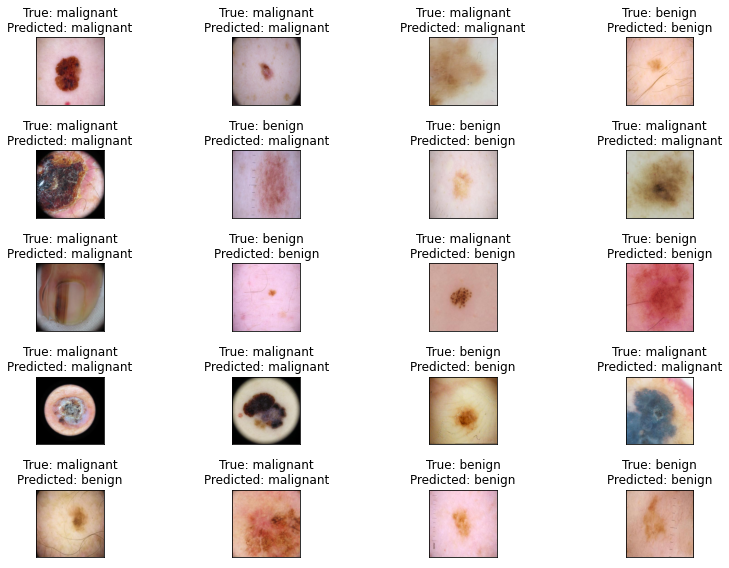

In [49]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.FilePath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {predicted_labels_names[i]}")
plt.tight_layout()
plt.show()

In [50]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

96/96 [==============================] - 19s 195ms/step - loss: 0.3133 - accuracy: 0.8830
Test Accuracy: 88.30%


1/1 [==============================] - 0s 46ms/step


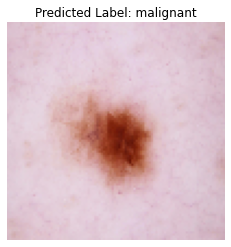

In [51]:
from tensorflow.keras.preprocessing import image

img_path = "C:\\Users\\Sherif Tarfa\\Downloads\\archive\\data\\test\\benign\\31.jpg"
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

predictions = model.predict(img_array)
predicted_label = np.argmax(predictions, axis=1)[0]

class_labels = train_generator.class_indices
inverse_class_labels = {v: k for k, v in class_labels.items()}
predicted_label_name = inverse_class_labels[predicted_label]

plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label_name}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 42ms/step


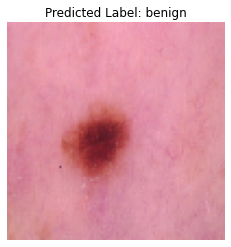

In [66]:
img_path = r"C:\Users\Sherif Tarfa\Downloads\archive\data\test\benign\83.jpg"
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_label = np.argmax(predictions, axis=1)[0]

class_labels = train_generator.class_indices
inverse_class_labels = {v: k for k, v in class_labels.items()}
predicted_label_name = inverse_class_labels[predicted_label]

plt.imshow(img)
plt.title(f"Predicted Label: {predicted_label_name}")
plt.axis('off')
plt.show()